In [2]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
data = pd.read_excel('Canva_reviews.xlsx')
data.head()

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaT,Negative,others,bug_app_crash
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28,Negative,others,bug_other


In [4]:
data.shape

(1500, 13)

In [5]:
data.loc[13, 'review']

'Unable to save my work. Nothing works :('

In [6]:
data.loc[13, 'Sentiment']

'Negative'

In [7]:
data.loc[1495, 'review']

'Absolutely amazing and a lifesaver for teachers.'

In [8]:
data.loc[1495, 'Sentiment']

'Positive'

In [9]:
data['Sentiment'].value_counts()

Positive    1032
Negative     468
Name: Sentiment, dtype: int64

### Bar plot of 'Sentiment'

<Axes: xlabel='Sentiment', ylabel='count'>

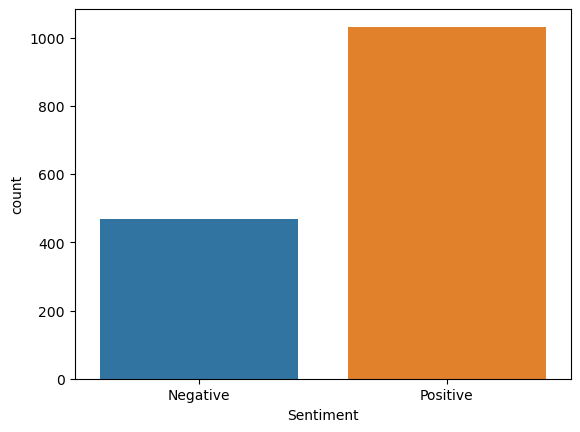

In [10]:
sns.countplot(x='Sentiment', data=data)

In [11]:
data['Sentiment'].value_counts()

Positive    1032
Negative     468
Name: Sentiment, dtype: int64

###  Bar plot of 'score'

<Axes: xlabel='score', ylabel='count'>

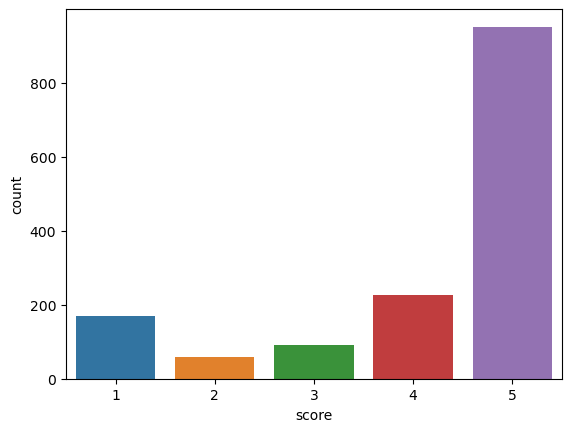

In [13]:
sns.countplot(data=data, x='score')

### Check relationship between 'score' and 'sentiment'

<Axes: xlabel='score', ylabel='count'>

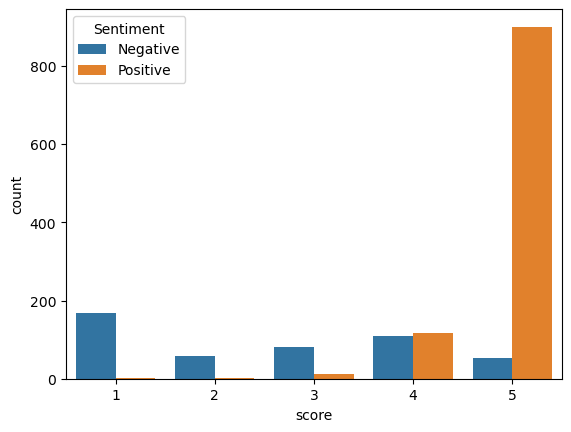

In [15]:
sns.countplot(x='score', data=data, hue='Sentiment')

### Find the length of each 'review'

In [23]:
data['len'] = data['review'].apply(len)

In [24]:
data['len'].describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: len, dtype: float64

### Plot the histogram of 'len'

<Axes: xlabel='len', ylabel='Count'>

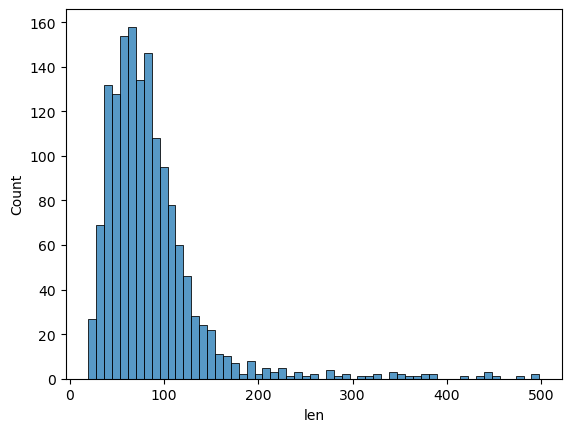

In [26]:
sns.histplot(data['len'])

### Plot the distribution of 'len' for different 'Sentiment' types

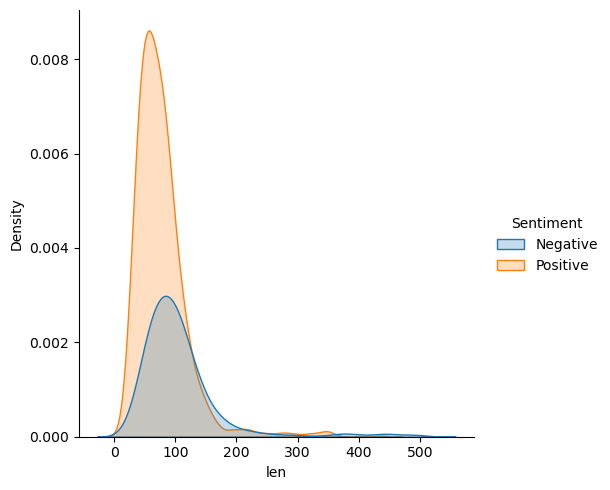

In [28]:
sns.displot(data=data, x='len', hue='Sentiment', kind='kde', fill=True)

### Tokenization

In [29]:
data = data[['review', 'Sentiment']]

In [30]:
data.loc[13, 'review']

'Unable to save my work. Nothing works :('

In [31]:
sent_tokenize(data.loc[13, 'review'])

['Unable to save my work.', 'Nothing works :(']

In [32]:
data.loc[1495, 'review']

'Absolutely amazing and a lifesaver for teachers.'

In [33]:
sent_tokenize(data.loc[1495, 'review'])

['Absolutely amazing and a lifesaver for teachers.']